<a href="https://colab.research.google.com/github/Volodymyr-SV/udemy-ML/blob/main/Day_8%20Prediction_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_pred = []

## Methods

In [13]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_LR = LR_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_LR.reshape(len(y_pred_LR),1)),1))

cm = confusion_matrix(y_test, y_pred_LR)
print(cm)
# accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)
y_pred_KNN = KNN_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_KNN.reshape(len(y_pred_KNN),1)),1))

cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)

[[64  4]
 [ 3 29]]


In [14]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel = 'linear', random_state = 0)
SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_SVC.reshape(len(y_pred_SVC),1)),1))

cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)

[[66  2]
 [ 8 24]]


In [15]:
from sklearn.svm import SVC
KSVC_classifier = SVC(kernel = 'rbf', random_state = 0)
KSVC_classifier.fit(X_train, y_train)
y_pred_KSVC = KSVC_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_KSVC.reshape(len(y_pred_KSVC),1)),1))

cm = confusion_matrix(y_test, y_pred_KSVC)
print(cm)

[[64  4]
 [ 3 29]]


In [16]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_NB.reshape(len(y_pred_NB),1)),1))

cm = confusion_matrix(y_test, y_pred_NB)
print(cm)

[[65  3]
 [ 7 25]]


In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)
y_pred_DT = DT_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_DT.reshape(len(y_pred_DT),1)),1))

cm = confusion_matrix(y_test, y_pred_DT)
print(cm)

[[62  6]
 [ 3 29]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC_classifier = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
RFC_classifier.fit(X_train, y_train)
y_pred_RFC = RFC_classifier.predict(X_test)

y_pred.append(np.concatenate((y_test.reshape(len(y_test),1), y_pred_RFC.reshape(len(y_pred_RFC),1)),1))

cm = confusion_matrix(y_test, y_pred_RFC)
print(cm)

[[62  6]
 [ 4 28]]


## Differences in prediction

In [8]:
y_diff = []
for diff_pred in y_pred:
    diff = []
    for i, j in enumerate(diff_pred):
        if j[0] != j[1]: diff.append(i)
    y_diff.append(np.array(diff))
y_diff = np.array(y_diff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [9]:
for i in y_diff: 
    print(i)

[ 9 31 55 58 63 73 76 81 88 95 97]
[ 9 15 31 53 81 85 95]


In [10]:
y_diff = []
for diff_pred in y_pred:
    d = {}
    for i, j in enumerate(diff_pred):
        if j[0] != j[1]:
            if j[0] == 2: d[i] = "False Positive"
            else: d[i] = "False Negative"
    y_diff.append(d)
print(y_diff[0])

{9: 'False Negative', 31: 'False Negative', 55: 'False Negative', 58: 'False Negative', 63: 'False Negative', 73: 'False Negative', 76: 'False Negative', 81: 'False Negative', 88: 'False Negative', 95: 'False Negative', 97: 'False Negative'}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


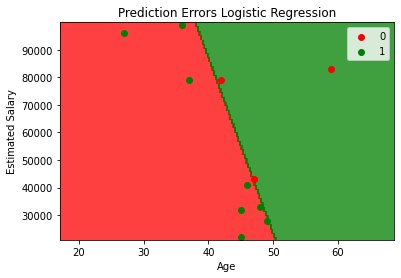

In [11]:
from matplotlib.colors import ListedColormap
X_new = [X_test[i] for i in y_diff[0].keys()]
y_new = [y_test[i] for i in y_diff[0].keys()]
X_set, y_set = sc.inverse_transform(X_new), y_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2,LR_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Prediction Errors Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()